## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 5*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------



2. Tomar dos fotos de una misma escena pero con diferentes iluminaciones. Leer las imágenes correspondientes en Python y hacer lo siguiente:

    1. Construir en ambos casos los histogramas normalizados R,G,B (puede usar los 256 bines, u otra cantidad, por ejemplo 16 bines por cada canal de color).

    2. Proponer una distancia que permita comparar dos histogramas.

    3. Comparar las distancias obtenidas entre las dos fotos tomadas, y otras fotos de su elección, no relacionadas con sus fotos. Evaluar por ejemplo la distribución de las distancias obtenidas.

    4. Ahora, convertir cada imagen RGB a HSV.

    5. Construir esta vez histogramas en H,S (en 2D) y repetir el paso 3

____
#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [91]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

___
#### *Leer las imágenes*

Leer las dos imágenes iguales pero con diferentes ilumainaciones

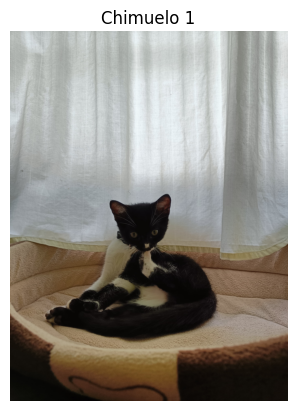

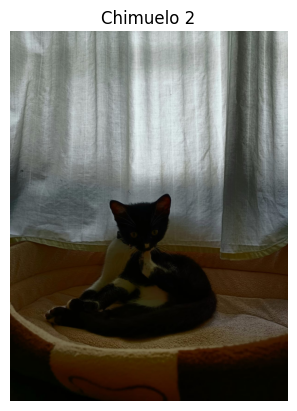

In [92]:
# Leer las imágenes de la carpeta imgs
img_chimuelo = cv2.imread("imgs/img_chimuelo.jpg")
img_chimuelo2 = cv2.imread("imgs/img_chimuelo2.jpg")

# Converit imagen a RGB, porque en OpenCV se lee como BGR
chimuelo1_rgb = cv2.cvtColor(img_chimuelo, cv2.COLOR_BGR2RGB)
chimuelo2_rgb = cv2.cvtColor(img_chimuelo2, cv2.COLOR_BGR2RGB)


plt.imshow(chimuelo1_rgb)
plt.title('Chimuelo 1')
plt.axis('off') 
plt.show()

plt.imshow(chimuelo2_rgb)
plt.title('Chimuelo 2')
plt.axis('off') 
plt.show()


___
#### *Histogramas*

Histogramas normalizados R,G,B de 256 bines. 

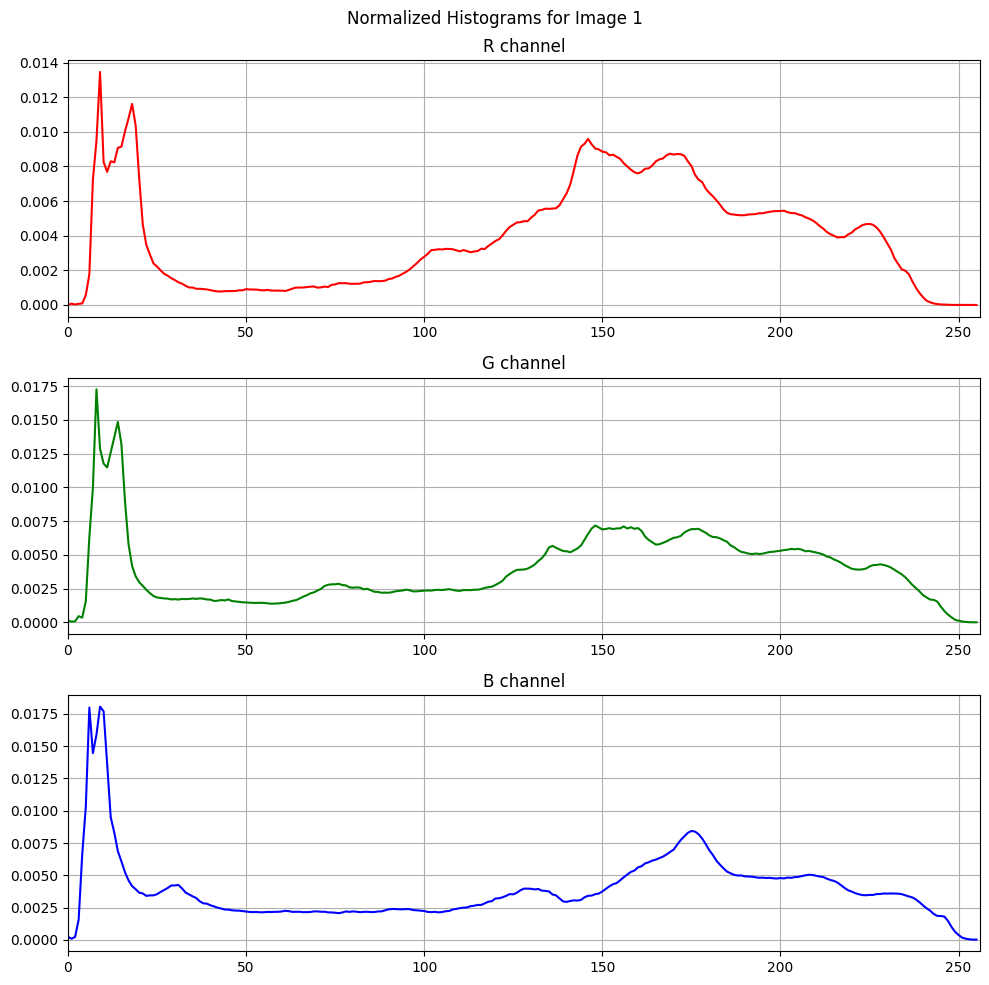

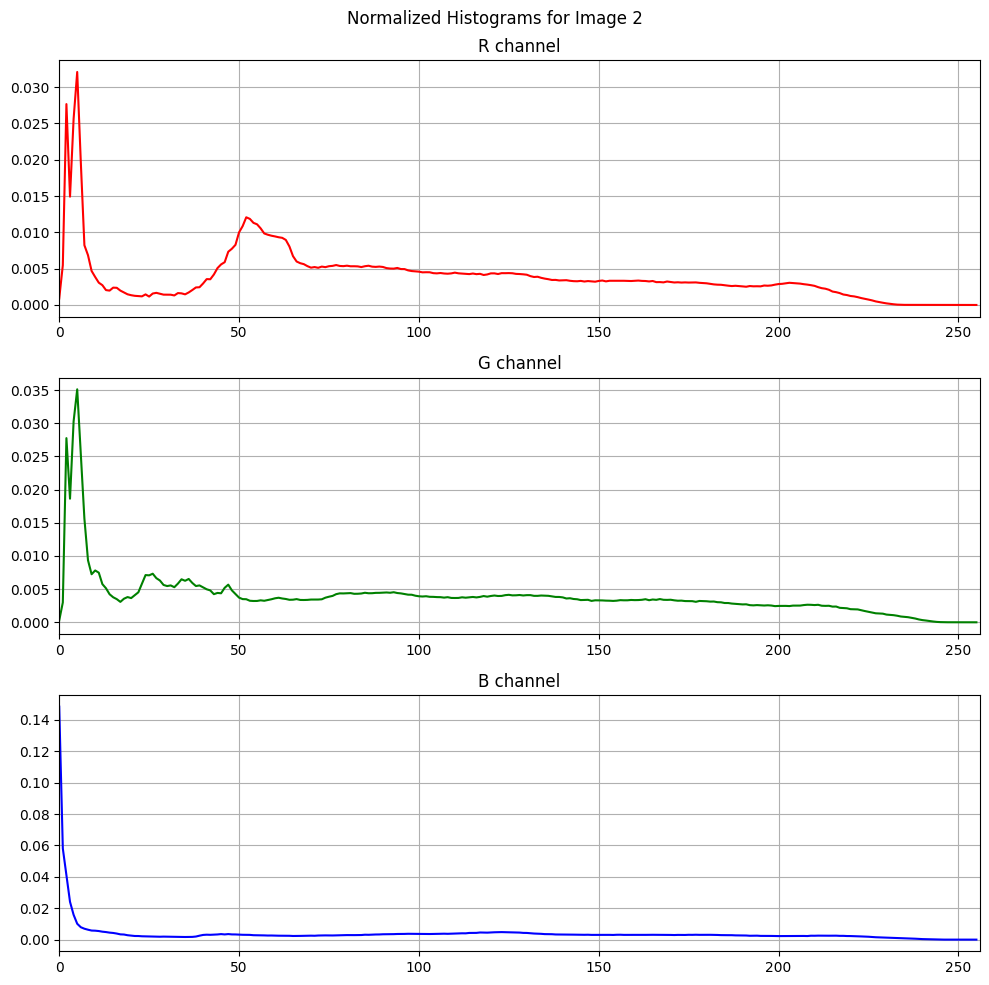

In [93]:
# Funcion para graficar histogramas
def plot_normalized_histograms(image, title):
    # Inicializar la figura
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))
    fig.suptitle(title)

    color = ('r', 'g', 'b')
    # Calcular el histograma para cada canal
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]) #imagen, ninguna mascara, 256 bins, 0-256 rango
        # Normalize the histogram
        hist = hist / hist.sum()
        ax[i].plot(hist, color=col)
        ax[i].set_xlim([0, 256])
        ax[i].set_title(f'{col.upper()} channel')
        ax[i].grid(True)

    plt.tight_layout()
    plt.show()


plot_normalized_histograms(chimuelo1_rgb, 'Normalized Histograms for Image 1')
plot_normalized_histograms(chimuelo2_rgb, 'Normalized Histograms for Image 2')


___
#### *Distancia*

Distancia de Chi-cuadrado: Mide la discrepancia entre dos histogramas como la suma de los cuadrados de las diferencias entre los bines correspondientes, dividida por la suma de los histogramas.

1. La distancia Chi-cuadrado entre los histogramas normalizados de las dos imágenes de chimuelo para cada canal de color es la siguiente:

Canal Rojo (R): 0.00552
Canal Verde (G): 0.00370
Canal Azul (B): 0.00467

In [94]:
# Funcion para calcular la distancia Chi-Squared entre dos histogramas
def chi_squared_distance(hist1, hist2):
    # calcular la diancia chi-cuadrada
    return np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-10))


In [95]:
# CaLcular los histogramas normalizados para cada canal en ambas imagenes
hist1_r = cv2.calcHist([chimuelo1_rgb], [0], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,0])
hist1_g = cv2.calcHist([chimuelo1_rgb], [1], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,1])
hist1_b = cv2.calcHist([chimuelo1_rgb], [2], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,2])

hist2_r = cv2.calcHist([chimuelo2_rgb], [0], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,0])
hist2_g = cv2.calcHist([chimuelo2_rgb], [1], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,1])
hist2_b = cv2.calcHist([chimuelo2_rgb], [2], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,2])

# Calcular la distancia Chi-Squared para cada canal
chi_sq_dist_r = chi_squared_distance(hist1_r, hist2_r)
chi_sq_dist_g = chi_squared_distance(hist1_g, hist2_g)
chi_sq_dist_b = chi_squared_distance(hist1_b, hist2_b)

(chi_sq_dist_r, chi_sq_dist_g, chi_sq_dist_b)

(0.005519317421747112, 0.0037014311254908276, 0.004666551971170831)

2. Para la primera imagen adicional (Gatito 1):

Canal Rojo (R): 0.00351
Canal Verde (G): 0.00263
Canal Azul (B): 0.00248

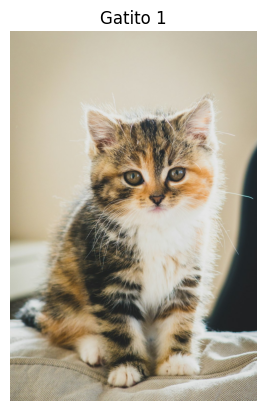

In [96]:
# imagen gatito 1
img_gatito = cv2.imread("imgs/gatito.jpeg")

# Converit imagen a RGB, porque en OpenCV se lee como BGR
img_gatito_rgb = cv2.cvtColor(img_gatito, cv2.COLOR_BGR2RGB)

plt.imshow(img_gatito_rgb)
plt.title('Gatito 1')
plt.axis('off')
plt.show()



In [97]:
# Calcular los histogramas normalizados para cada canal en ambas imagenes
hist_gatito1_r = cv2.calcHist([img_gatito_rgb], [0], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,0])
hist_gatito1_g = cv2.calcHist([img_gatito_rgb], [1], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,1])
hist_gatito1_b = cv2.calcHist([img_gatito_rgb], [2], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,2])

# Calcular la distancia Chi-Squared para cada canal
chi_sq_dist_r = chi_squared_distance(hist1_r, hist_gatito1_r)
chi_sq_dist_g = chi_squared_distance(hist1_g, hist_gatito1_g)
chi_sq_dist_b = chi_squared_distance(hist1_b, hist_gatito1_b)

(chi_sq_dist_r, chi_sq_dist_g, chi_sq_dist_b)


(0.003518300345819698, 0.0026376998155713547, 0.002480302026645247)

2. Para la segunda imagen adicional (Gatito 2):

Canal Rojo (R): 0.00416
Canal Verde (G): 0.00317
Canal Azul (B): 0.00280

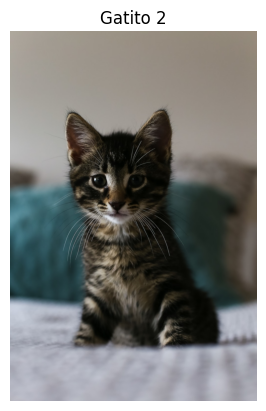

In [98]:
# imagen gatito 2
img_gatito2 = cv2.imread("imgs/gatito2.jpeg")

# Converit imagen a RGB, porque en OpenCV se lee como BGR
img_gatito2_rgb = cv2.cvtColor(img_gatito2, cv2.COLOR_BGR2RGB)

plt.imshow(img_gatito2_rgb)
plt.title('Gatito 2')
plt.axis('off')
plt.show()


In [99]:
# Calcular los histogramas normalizados para cada canal en ambas imagenes
hist_gatito2_r = cv2.calcHist([img_gatito2_rgb], [0], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,0])
hist_gatito2_g = cv2.calcHist([img_gatito2_rgb], [1], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,1])
hist_gatito2_b = cv2.calcHist([img_gatito2_rgb], [2], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,2])

# Calcular la distancia Chi-Squared para cada canal
chi_sq_dist_r = chi_squared_distance(hist1_r, hist_gatito2_r)
chi_sq_dist_g = chi_squared_distance(hist1_g, hist_gatito2_g)
chi_sq_dist_b = chi_squared_distance(hist1_b, hist_gatito2_b)

(chi_sq_dist_r, chi_sq_dist_g, chi_sq_dist_b)

(0.004166780497914351, 0.0031638717453327486, 0.0028029218234450533)

___
#### *RGB a HSV*

Convertir cada imagen RGB a HSV

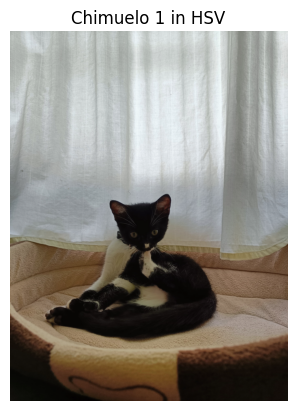

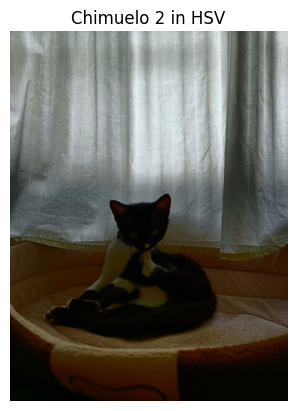

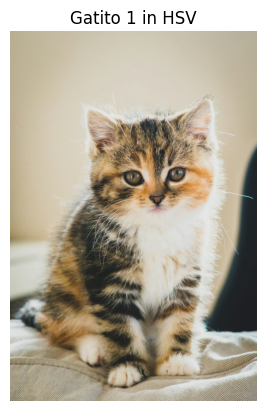

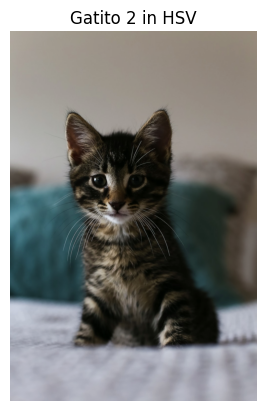

In [100]:
# Funcion para convertir una imagen RGB a HSV y calcular histogramas normalizados para H y S
def convert_to_hsv_and_hist(image):
    # Convertir la imagen de RGB a HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    return hsv_image

# Convertir las imagenes originales y adicionales a HSV y obtener sus histogramas
chimuelo1_hsv = convert_to_hsv_and_hist(chimuelo1_rgb)
chimuelo2_hsv= convert_to_hsv_and_hist(chimuelo2_rgb)
gatito1_hsv = convert_to_hsv_and_hist(img_gatito_rgb)
gatito2_hsv = convert_to_hsv_and_hist(img_gatito2_rgb)

# Verificar la conversion mostrando las imagenes HSV y sus histogramas H y S
plt.imshow(cv2.cvtColor(chimuelo1_hsv, cv2.COLOR_HSV2RGB))
plt.title('Chimuelo 1 in HSV')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(chimuelo2_hsv, cv2.COLOR_HSV2RGB))
plt.title('Chimuelo 2 in HSV')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(gatito1_hsv, cv2.COLOR_HSV2RGB))
plt.title('Gatito 1 in HSV')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(gatito2_hsv, cv2.COLOR_HSV2RGB))
plt.title('Gatito 2 in HSV')
plt.axis('off')
plt.show()


___
#### *Histogramas en H,S (2D)*

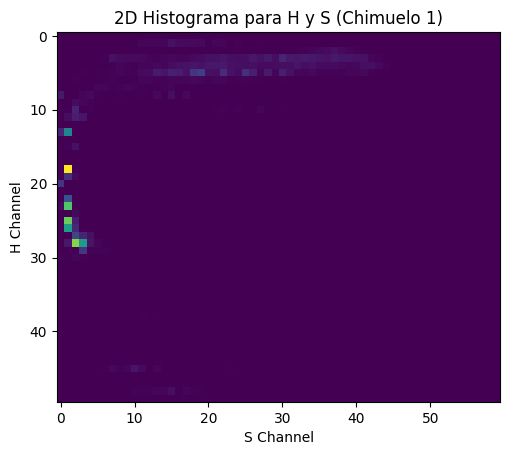

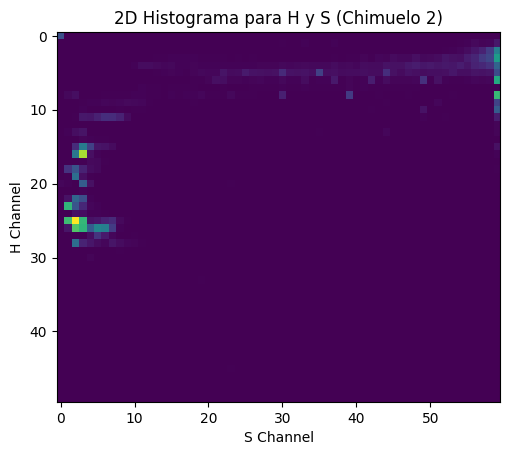

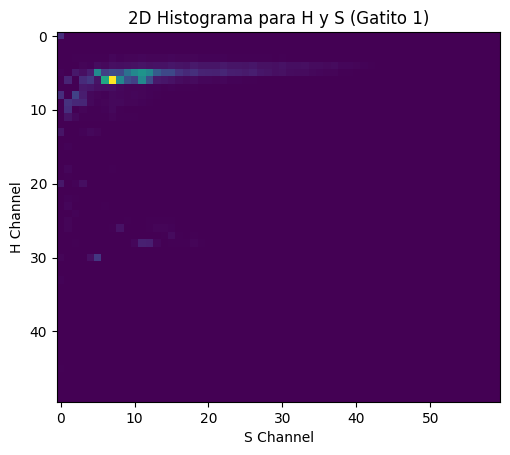

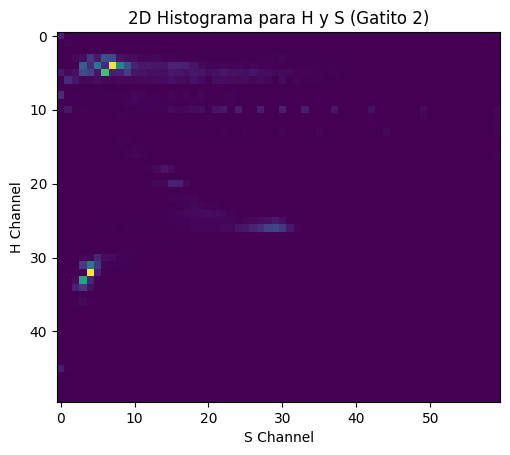

In [101]:
# Funcion para calcular histogramas 2D para los canales H y S y graficarlos
def plot_2d_hist_h_s(image_hsv, title):
    h_bins = 50  # Hue is from 0 to 179 in OpenCV
    s_bins = 60  # Saturation is from 0 to 255
    hist = cv2.calcHist([image_hsv], [0, 1], None, [h_bins, s_bins], [0, 180, 0, 256])
    
    # Histogramas normalizados
    hist_normalized = cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    plt.imshow(hist_normalized, interpolation='nearest')
    plt.title(title)
    plt.xlabel('S Channel')
    plt.ylabel('H Channel')
    plt.show()

    return hist_normalized

# Construir histogramas 2D para los canales H y S y graficarlos
hist_2d_chimuelo1 = plot_2d_hist_h_s(chimuelo1_hsv, '2D Histograma para H y S (Chimuelo 1)')
hist_2d_chimuelo2= plot_2d_hist_h_s(chimuelo2_hsv, '2D Histograma para H y S (Chimuelo 2)')
hist_2d_gatito1 = plot_2d_hist_h_s(gatito1_hsv, '2D Histograma para H y S (Gatito 1)')
hist_2d_gatito2 = plot_2d_hist_h_s(gatito2_hsv, '2D Histograma para H y S (Gatito 2)')

_____
#### *Distancia HS*
Nuevamente se utiliza Chi=cuadrado para comparar las distancias entre las fotos tomadas de chimuelo y las otras dos fotso adisculaes de gatitos, pero esta ve4z con digramas HS (2D)

Los resultados fueron los siguientes:
- Chimuelo1 vs Chimuelo 2: 25.380226
- Chimuelo1 vs Gatito 1: 17.697647
- Chimuelo1 vs Gatito 2: 22.2194


In [102]:
# Funcion para calcular la distancia Chi-Squared entre dos histogramas 2D
def chi_squared_distance_2d(hist1, hist2):
    return np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-10))

# Calcular la distancia Chi-Squared entre los histogramas 2D entre la imagen original y las adicionales
chi_sq_2d_dist_orig = chi_squared_distance_2d(hist_2d_chimuelo1, hist_2d_chimuelo2)
chi_sq_2d_dist_orig_add1 = chi_squared_distance_2d(hist_2d_chimuelo1, hist_2d_gatito1)
chi_sq_2d_dist_orig_add2 = chi_squared_distance_2d(hist_2d_chimuelo1, hist_2d_gatito2)

# Combine the distances for easier comparison
chi_sq_2d_distances = {
    'Chimuelo1 vs Chimuelo 2': chi_sq_2d_dist_orig,
    'Chimuelo1 vs Gatito 1': chi_sq_2d_dist_orig_add1,
    'Chimuelo1 vs Gatito 2': chi_sq_2d_dist_orig_add2,
}

chi_sq_2d_distances


{'Chimuelo1 vs Chimuelo 2': 25.380226,
 'Chimuelo1 vs Gatito 1': 17.697647,
 'Chimuelo1 vs Gatito 2': 22.2194}